<a href="https://colab.research.google.com/github/ericzundel/imagecapturegui/blob/main/Copy_of_Rhyland_ONeill_Final_Student_Recognition_Model_Template_Starter_ipynb_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the starting point of your final face recognition model.  You will need to fill in all of the missing boxes with correct code.  You are also required to write correct and descriptive comments in each block. Your model needs to reach a 80% accuracy on your testing data for your final project.**

In [ ]:
from tensorflow import keras #imports all of the necessary libraries and functions from libraries that are needed to run this code
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import os, shutil, pathlib
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [ ]:
def show_image(im): #defines show_image, and shows the image with the summer color
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [ ]:
def show_image_vpp(im,value,prediction,probability): #defines an image's value, prediction, and probability and prints text with the statements. also shows the imagee with the summer color
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",student_names[value])
  print("The predicted value is ",student_names[prediction]," with probability: ",probability)

Keep this as is for now. Once you get everything running, you will come back to this and build out the layers using what you know.

In [ ]:
def build_model(input_shape): #builds the layers of the model including the input layer, the inside layers, and the output layer. also defines it as build_model and returns the model
    input = keras.Input(shape=(input_shape,),name="data")
    l1 = layers.Dense(512,activation="relu")(input)
    l2 = layers.Dense(512,activation="relu")(l1)
    output = layers.Dense(38,activation="softmax")(l2)
    model = keras.Model(inputs=input,outputs=output)
    return model

1) Explain what the 38 means in the output layer.  

Answer: The 38 represents the output, which represents the dataset, and the 38 is the amount of people who took pictures.

Note that the number of epochs below is 1.  Don't change it for now, but after you get everything else working, you will need to come back and address this to improve your model's accuracy.  

In [ ]:
def train_model(model,train_tensors,train_labels): #defines train model, compiles the model, optimizes it, and fits the model
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=120)

2) How do you know if you need more or less epochs?  

Answer: When you have too much data or too little data that can determine how many epochs you need.

In [ ]:
def predict(model,test_tensors): #defines the model predict as an array and returns it with predictions and probability
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions])
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)])
    return digit_predictions,digit_probability

# Get the training and testing data.  Use this video if you are absent when I go over this in class.  

This is new code and it is not expected that you understand this, but you need to add a shortcut to this folder on your google drive.  Once you have your shortcut, replace the below path after "My Drive/" with your path. I will walk you through this step in class. Once you have done that, run this code to confirm you are accessing the class image files.  If you are not here when we do this part, you can watch this video of how to do it here: https://www.loom.com/share/4316be2eaac34ddfa1fcfed7d7bbbbcf?sid=725db59f-5ceb-43b4-bb14-5c37dd947108
  

Folder link: https://drive.google.com/drive/folders/1Lnhpm_B231bTZ8__k6Rw3BYDwei-dQYO?usp=sharing


In [ ]:
from google.colab import drive #imports the data from google drive as images
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003"
plt.figure(figsize=(10, 10))
size_picture = 100

Mounted at /content/gdrive
 Alexandra_Price      Destin_Woolf	  Justin_Leake	  "Rhyland_O'Neill"
 Armon_Anderson       Donald_Humphrey	  Kaci_Turner	  'Tahlin_Thompson Saunders-Brathwaite'
 Austin_Smith	      Don_Evans		  Kenadie_Smith    Tarrence_Sturdivant
 Beth_White	      Emma_Davis	  Kendrick_Myers   Thorn_High
 Chase_Griffin	      Eric_Ayers	  Kristine_Allen   Trinity_Smith
 Christian_Hill       Jackson_Humphries   Laila_Shannon    Tunazi_Bello
 Cordarius_Williams   Jonathan_Thompson   Landon_Cox	   Victor_Hicks
 Curtis_Augustin      Joshua_Boney	  Lucian_Leon	  'Zediwa_De Jesus'
 David_Kurt	      Julian_Carlson	  Malik_Weems
 Destin_Jack	      Justin_Brown	  Peter_McKnight


<Figure size 1000x1000 with 0 Axes>

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

3) In the digit recognition model, what did this (above) block of code do?  Break down your answer into all four parts.

Answer: The code is broken down into 4 different parts: train images, train labels, test images, and test labels.

Bonus: The combination of the two next functions will do what the above function did for the MNIST dataset.  You can get up to 40 KT bonus on your project if you can write correct line by line comments on what these lines of code do.  This must be your own work to be considered for bonus. Do not use another person or AI to help. If yo don't want bonus, just run the next two code blocks.

In [ ]:
def tensor_from_image(filename): #defines tensor_from_image as a filename
    img = load_img(filename,color_mode = 'grayscale') #loads an image in the grayscale color
    img = img.resize((size_picture,size_picture)) #resizes the image
    return img_to_array(img).reshape((size_picture,size_picture)) #returns the image to an array and reshapes it

In [ ]:
def load_dataset(): #defines the entire function as load_dataset
    train_images = [] #defines train_images as an empty list
    train_labels = [] #defines train_labels as an empty list
    test_images = [] #defines test_images as an empty list
    test_labels = [] #defines test_labels as an empty list
    base_directory = pathlib.Path('/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003') #sets the directory to the google drive folder containing the data
    student_names = os.listdir(base_directory) #gets the student_names list from the base directory
    k = 0 #sets k equal to zero
    n = 0 #sets n equal to zero
    names = [] #assigns the following data to the empty list called 'names'
    for i, s in enumerate(student_names): #enumerates each student name to s
        print(i,s) #prints i and s
        if s!=".DS_Store": #checks if the names are equal to .DS_Store
            names.append(s) #appends the names (s) to names
            student_directory = base_directory / s #assigns the student directory to the base directory and names
            image_names = os.listdir(student_directory) #gets a list of image names in the student_directory using the os.listdir() function
            for i in image_names: #for every image name (i) in the directory
                fname = student_directory / i #sets fname equal to the student_directory and image names (i)
                t = tensor_from_image(fname)/255 #/ 255 #loads the image data and assigns it to t
                if n % 9 == 0: #defines a conditional statement for if n is divisible by 9 then it will do the following below:
                    test_images.append(t) #appends to the test_images dataset
                    test_labels.append(k) #appends to the test_labels dataset
                else: #if the image doesn't fit the conditional it does the following below:
                    train_images.append(t) #appends to the train_images dataset
                    train_labels.append(k) #appends to the train_labels dataset
                n += 1 #counts the number of images in the testing dataset
            k += 1 #counts the number of images in the training datset
    return (k, #returns k
            (np.array(train_images),np.array(train_labels)), #returns the training dataset as a numpy array
            (np.array(test_images),np.array(test_labels)), #returns the test dataset as a numpy array
            names #returns the names linked to the the images
           )

Run this code to load your data.  

In [ ]:
(nb_students,(train_images,train_labels),(test_images,test_labels),student_names) = load_dataset() #loads all of the data in the nb_students dataset

0 Donald_Humphrey
1 Chase_Griffin
2 Armon_Anderson
3 Joshua_Boney
4 Destin_Jack
5 Beth_White
6 Lucian_Leon
7 Jonathan_Thompson
8 Tahlin_Thompson Saunders-Brathwaite
9 Julian_Carlson
10 Laila_Shannon
11 Destin_Woolf
12 Malik_Weems
13 Kaci_Turner
14 Thorn_High
15 Cordarius_Williams
16 Tunazi_Bello
17 Victor_Hicks
18 Peter_McKnight
19 Zediwa_De Jesus
20 Justin_Brown
21 Alexandra_Price
22 Kendrick_Myers
23 Eric_Ayers
24 Curtis_Augustin
25 Kenadie_Smith
26 Rhyland_O'Neill
27 Justin_Leake
28 Jackson_Humphries
29 Tarrence_Sturdivant
30 Austin_Smith
31 Kristine_Allen
32 David_Kurt
33 Emma_Davis
34 Landon_Cox
35 Christian_Hill
36 Trinity_Smith
37 Don_Evans


Print out each of the six items in the loaded data to get an idea of or refresh yourself on what they are.

4) Print the first item.

In [ ]:
nb_students #prints nb_students

38

5) Print the second item.

In [ ]:
train_images #prints train_images as an array

array([[[0.6313726 , 0.6313726 , 0.6313726 , ..., 0.6       ,
         0.6431373 , 0.63529414],
        [0.6313726 , 0.6313726 , 0.627451  , ..., 0.6509804 ,
         0.69803923, 0.6392157 ],
        [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.65882355,
         0.7019608 , 0.6431373 ],
        ...,
        [0.47843137, 0.49019608, 0.5058824 , ..., 0.7882353 ,
         0.78039217, 0.7882353 ],
        [0.45882353, 0.4509804 , 0.44705883, ..., 0.72156864,
         0.7882353 , 0.7137255 ],
        [0.47058824, 0.4627451 , 0.4745098 , ..., 0.64705884,
         0.7882353 , 0.6156863 ]],

       [[0.6313726 , 0.627451  , 0.627451  , ..., 0.6       ,
         0.6392157 , 0.6313726 ],
        [0.627451  , 0.62352943, 0.62352943, ..., 0.6431373 ,
         0.69803923, 0.63529414],
        [0.627451  , 0.62352943, 0.62352943, ..., 0.654902  ,
         0.69803923, 0.6392157 ],
        ...,
        [0.4745098 , 0.49019608, 0.5058824 , ..., 0.78039217,
         0.7764706 , 0.78039217],
        [0.4

6) Print the third item.

In [ ]:
train_labels #prints train_labels as an array

array([ 0,  0,  0, ..., 37, 37, 37])

7) Print the 4th item.

In [ ]:
test_images #prints test_images as an array

array([[[0.69411767, 0.69803923, 0.7019608 , ..., 0.5176471 ,
         0.5568628 , 0.5372549 ],
        [0.69803923, 0.6784314 , 0.6392157 , ..., 0.54901963,
         0.59607846, 0.57254905],
        [0.5058824 , 0.4392157 , 0.39215687, ..., 0.53333336,
         0.5921569 , 0.54901963],
        ...,
        [0.38039216, 0.37254903, 0.35686275, ..., 0.6313726 ,
         0.64705884, 0.65882355],
        [0.3647059 , 0.2901961 , 0.23529412, ..., 0.54901963,
         0.65882355, 0.54901963],
        [0.2       , 0.16470589, 0.19215687, ..., 0.49803922,
         0.6392157 , 0.5254902 ]],

       [[0.5882353 , 0.58431375, 0.58431375, ..., 0.57254905,
         0.61960787, 0.6156863 ],
        [0.58431375, 0.5803922 , 0.5803922 , ..., 0.6156863 ,
         0.6745098 , 0.6313726 ],
        [0.58431375, 0.58431375, 0.58431375, ..., 0.62352943,
         0.68235296, 0.62352943],
        ...,
        [0.46666667, 0.46666667, 0.47058824, ..., 0.7411765 ,
         0.7411765 , 0.7490196 ],
        [0.4

8) Print the 5th item.

In [ ]:
test_labels #prints test_labels as an array

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 27

9) Print the 6th item.

In [ ]:
student_names #prints all of the student names

['Donald_Humphrey',
 'Chase_Griffin',
 'Armon_Anderson',
 'Joshua_Boney',
 'Destin_Jack',
 'Beth_White',
 'Lucian_Leon',
 'Jonathan_Thompson',
 'Tahlin_Thompson Saunders-Brathwaite',
 'Julian_Carlson',
 'Laila_Shannon',
 'Destin_Woolf',
 'Malik_Weems',
 'Kaci_Turner',
 'Thorn_High',
 'Cordarius_Williams',
 'Tunazi_Bello',
 'Victor_Hicks',
 'Peter_McKnight',
 'Zediwa_De Jesus',
 'Justin_Brown',
 'Alexandra_Price',
 'Kendrick_Myers',
 'Eric_Ayers',
 'Curtis_Augustin',
 'Kenadie_Smith',
 "Rhyland_O'Neill",
 'Justin_Leake',
 'Jackson_Humphries',
 'Tarrence_Sturdivant',
 'Austin_Smith',
 'Kristine_Allen',
 'David_Kurt',
 'Emma_Davis',
 'Landon_Cox',
 'Christian_Hill',
 'Trinity_Smith',
 'Don_Evans']

10) Assign the shape of train_images to train_shape. Print train_shape.

In [ ]:
train_shape = np.shape(train_images) #assigns the shape of train images to train shape and prints train_shape
train_shape

(2244, 100, 100)

11) Print out the first image train_images in matrix format.



In [ ]:
train_images[0] #prints the first image in train_images as a matrix

array([[0.6313726 , 0.6313726 , 0.6313726 , ..., 0.6       , 0.6431373 ,
        0.63529414],
       [0.6313726 , 0.6313726 , 0.627451  , ..., 0.6509804 , 0.69803923,
        0.6392157 ],
       [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.65882355, 0.7019608 ,
        0.6431373 ],
       ...,
       [0.47843137, 0.49019608, 0.5058824 , ..., 0.7882353 , 0.78039217,
        0.7882353 ],
       [0.45882353, 0.4509804 , 0.44705883, ..., 0.72156864, 0.7882353 ,
        0.7137255 ],
       [0.47058824, 0.4627451 , 0.4745098 , ..., 0.64705884, 0.7882353 ,
        0.6156863 ]], dtype=float32)

12) Print out the first image in train images in image format.

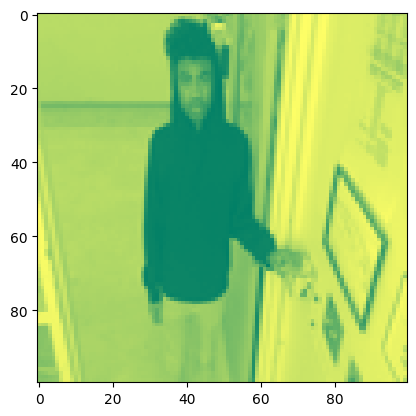

In [ ]:
show_image(train_images[0]) #prints the image in image format

13) Print out the label for this image.

In [ ]:
train_labels[0] #prints the label for the first image

0

Print out the name associated with this label.

In [ ]:
student_names[0] #prints the name associated with this label

'Donald_Humphrey'

14) Print out the second name in student_names.

In [ ]:
student_names[1] #prints the second name in student_names

'Chase_Griffin'

*15*) Write a for loop to print out all of the names in the list student_names and their indices (indexes).  

In [ ]:
for i in range(38): #prints out all of the names in the list and their indexes.
  print(i,student_names[i])

0 Donald_Humphrey
1 Chase_Griffin
2 Armon_Anderson
3 Joshua_Boney
4 Destin_Jack
5 Beth_White
6 Lucian_Leon
7 Jonathan_Thompson
8 Tahlin_Thompson Saunders-Brathwaite
9 Julian_Carlson
10 Laila_Shannon
11 Destin_Woolf
12 Malik_Weems
13 Kaci_Turner
14 Thorn_High
15 Cordarius_Williams
16 Tunazi_Bello
17 Victor_Hicks
18 Peter_McKnight
19 Zediwa_De Jesus
20 Justin_Brown
21 Alexandra_Price
22 Kendrick_Myers
23 Eric_Ayers
24 Curtis_Augustin
25 Kenadie_Smith
26 Rhyland_O'Neill
27 Justin_Leake
28 Jackson_Humphries
29 Tarrence_Sturdivant
30 Austin_Smith
31 Kristine_Allen
32 David_Kurt
33 Emma_Davis
34 Landon_Cox
35 Christian_Hill
36 Trinity_Smith
37 Don_Evans


16) Reshape your train_images "from a box into a line" and assign them to train_tensors.  Print out train_tensors.shape to confirm that they have been put into a line.  

In [ ]:
train_tensors = train_images.reshape((train_shape[0],train_shape[1]*train_shape[2])) #reshapes the train_images into a line and assigns it to train_tensors then prints out the shape of train_tensors
train_tensors.shape

(2244, 10000)

17) Call the build model function with the correct parameter (the second value in train_tensors.shape).

In [ ]:
build_model(train_shape[1]*train_shape[2]) #calls the build model function with the parameters

18) Print out the model summary using the summary method.

In [ ]:
model = build_model(train_shape[1]*train_shape[2]) #prints out the model summary using the summary method
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 10000)]           0         
                                                                 
 dense_3 (Dense)             (None, 512)               5120512   
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 38)                19494     
                                                                 
Total params: 5402662 (20.61 MB)
Trainable params: 5402662 (20.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


19) Call the train model function with the appropraite parameters. Remember all functions are defined above if you need a reference.

In [ ]:
train_model(model,train_tensors,train_labels) #calls the train model function

Epoch 1/120
71/71 [==============================] - 8s 99ms/step - loss: 5.2573 - accuracy: 0.0900
Epoch 2/120
71/71 [==============================] - 6s 84ms/step - loss: 3.0997 - accuracy: 0.1555
Epoch 3/120
71/71 [==============================] - 8s 109ms/step - loss: 2.8053 - accuracy: 0.2139
Epoch 4/120
71/71 [==============================] - 6s 81ms/step - loss: 2.6654 - accuracy: 0.2393
Epoch 5/120
71/71 [==============================] - 6s 81ms/step - loss: 2.4780 - accuracy: 0.2830
Epoch 6/120
71/71 [==============================] - 7s 105ms/step - loss: 2.3868 - accuracy: 0.3070
Epoch 7/120
71/71 [==============================] - 6s 78ms/step - loss: 2.2476 - accuracy: 0.3347
Epoch 8/120
71/71 [==============================] - 7s 104ms/step - loss: 2.1561 - accuracy: 0.3578
Epoch 9/120
71/71 [==============================] - 6s 79ms/step - loss: 2.0444 - accuracy: 0.3850
Epoch 10/120
71/71 [==============================] - 6s 85ms/step - loss: 1.9652 - accuracy: 0.4

20) What is an epoch?

Answer: a fixed date and time used as a reference from which a computer measures system time

21) The model is trained; it is time to see how well it does at recognizing your faces!!  To do this you need to reshape the testing dataset and assign it to test_shape.


In [ ]:
test_shape = test_images.shape #reshapes the test_images and assigns it to test_shape. print out the shape
test_shape

22) Reshape your test_images "from a box to a line" and assign them to test_tensors.

In [ ]:
test_tensors = np.array(test_images).reshape(len(test_images), -1) #reshapes the test_images into a line and assigns the images to test_tensors


23) Print your 20th test image in matrix format.

In [ ]:
print(test_images[19]) #prints out the 20th[19] image in test_images in matrix format

24) Print your 20th test image in image format.

In [ ]:
plt.imshow(test_images[19],cmap=plt.cm.summer) #prints the 20th test image in image format in the summer color
plt.show()

25) Print the label that represents this image (numerical value).  

In [ ]:
test_labels[19] #prints the label of image 20

26) Print the corresponding students' name that is represented by this image.

In [ ]:
student_names[4] #prints the name that represents the image 20 label

Now we can make predictions and get probabilities.  I will be checking this block to make sure that everything above it has run. Do not edit this block of code at all.

In [ ]:
pred, prob = predict(model,test_tensors) #runs all of the predictions and probabilities in the test_tensors model

In [ ]:
pred #runs the predictions

27) Describe what these numerical values mean.

Answer: The numbers are telling us which image the computer is predicting it will be.

In [ ]:
prob #runs the probability

28) Describe what these numerical values mean.

Answer: These values are the probability that the computer was right about its predictions.

29) Print the 30th image in the test image dataset, its label and prediction and probability.

In [ ]:
show_image_vpp(test_images[29],test_labels[29], pred[29],prob[29]) #prints out the 30th image, its label, its pred, and its prob in test_images

30) Plot the 3rd image in the test_images dataset, its label, prediction, and probability.  

In [ ]:
show_image_vpp(test_images[2],test_labels[2], pred[2],prob[2]) #prints the 3rd image, its label, its pred, and its prob in test_images

Compute the number of wrong predictions. If everything above is running correctly this code block should run. Do not change it.  

In [ ]:
wrong_predictions_count = 0 #calculates the number of wrong predictions in the testing dataset and prints out the calculation
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

31) Explain which two items are being compared in your own words to get the "wrong_predictions."

Answer: The predictions and the actual test labels outcomes are being compared to get the wrong predictions

Determine the number of wrong predictions in the test dataset.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
wrong_predictions_count = 0 #calculates the number of wrong predictions in the testing dataset and prints out the calculation
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

Calculate the accuracy on the test_images.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
accuracy = 1-(wrong_predictions_count/len(test_labels)) #prints out the accuracy of the test images dataset
accuracy

32) Determine the number of wrong predictions in the training dataset.  


In [ ]:
wrong_predictions_count= 0 #calculates the number of wrong predictions in the training dataset and prints out the calculation
for i in range(train_images.shape[0]):
  if train_labels[i] != pred[i]:
    wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

In [ ]:
train_images.shape[0]

In [ ]:
range(train_images.shape[0])

33) Calculate the accuracy on the training_images.  

In [ ]:
accuracy1 = 1-(wrong_predictions_count/len(train_images)) #prints out the accuracy of the training dataset
accuracy1

34) Describe why the accuracy of the training images is higher than that of the testing images.  

Answer: The training images has more images to use to help train the algorithm which helps improve the accuracy


35) Display the first 10 faces in the training dataset, their predictions and probabilities.


In [ ]:
for i in range(10): #prints out the first 10 images, their predictions, and their probabilities in the training dataset
  show_image_vpp(test_images[i], test_labels[i], pred[i],prob[i])



Evaluate the accuracy of the training set using model.evaluate.  Do not change this code.


In [ ]:
model.evaluate(train_tensors, train_labels) #evaluates the accuracy of the training dataset

Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.

In [ ]:
model.evaluate(test_tensors, test_labels) #evaluates the accuracy of the testing dataset

Once you get this entire model working (don't worry about the accuracy yet), call me over to grade it.  Once you get it working it will be time to manipulate the building model function and training model function for accuracy.  